In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/train.csv')

In [2]:
data.head()

,Date,Keyword_ID,Ad_group_ID,Campaign_ID,Account_ID,Device_ID,Match_type_ID,Revenue,Clicks,Conversions
0,2014-12-14,88883763407,1042143654876,71672332180,861287123742,298643508640,95725474456,0.0,2,0
1,2014-12-14,837336088038,1038839743255,685307833020,654870334100,298643508640,95725474456,0.0,2,0
2,2014-12-14,220115136780,691864063258,551279817203,212779990172,848779586902,95725474456,0.0,2,0
3,2014-12-14,423389776473,1044670215658,551279817203,212779990172,848779586902,95725474456,0.0,5,0
4,2014-12-14,546746671314,355072204358,919168440848,212779990172,298643508640,95725474456,0.0,2,0


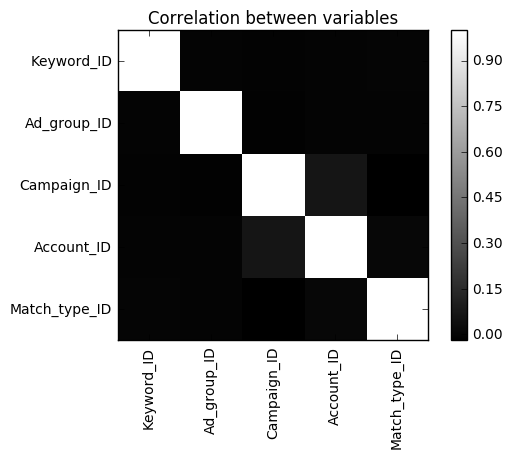

In [10]:
input_cols=['Keyword_ID', 'Ad_group_ID', 'Campaign_ID', 'Account_ID', 'Match_type_ID']
cor_mat = data[input_cols].corr()
plt.imshow(cor_mat, cmap='gray', interpolation='nearest')
plt.xticks(range(len(input_cols)),input_cols,rotation='vertical')
plt.yticks(range(len(input_cols)),input_cols)
plt.colorbar()
plt.title('Correlation between variables')
plt.show()

In [11]:
cor_mat

,Keyword_ID,Ad_group_ID,Campaign_ID,Account_ID,Match_type_ID
Keyword_ID,1.000000,0.001031,-0.003141,-0.000845,0.001653
Ad_group_ID,0.001031,1.000000,-0.009558,-0.001932,-0.000629
Campaign_ID,-0.003141,-0.009558,1.000000,0.066178,-0.018656
Account_ID,-0.000845,-0.001932,0.066178,1.000000,0.011738
Match_type_ID,0.001653,-0.000629,-0.018656,0.011738,1.000000


In [13]:
data_first_rows = data.head(n=100000)


In [ ]:
cols_to_transform = ['Keyword_ID', 'Ad_group_ID', 'Campaign_ID', 'Account_ID', 'Match_type_ID']
df_numeric = pd.get_dummies(data_first_rows, columns=cols_to_transform)